In [36]:
### Benjamin Tollison Hw8 ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate
import numpy as np
import matplotlib.pyplot as plt
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)

In [37]:
alpha,theta,c,u = symbols('alpha theta c u_\infty')
Dz_1 = c/10 * sin(theta)
Dz_2 = -c/15 * sin(theta)
Dz_3 = c/30 * sin(theta)
theta_a = sp.acos(3/5)
theta_b = sp.acos(-3/5)
theta_c = pi
A_0 = alpha - (1/pi * (integrate(Dz_1, (theta, 0, theta_a)) + integrate(Dz_2, (theta, theta_a, theta_c)) + integrate(Dz_3, (theta, theta_c, 2*pi))))
def A_n(n):
    return 2/pi * (integrate(Dz_1 * cos(n*theta), (theta, 0, theta_a)) + integrate(Dz_2 * cos(n*theta), (theta, theta_a, theta_b)) + integrate(Dz_3 * cos(n*theta), (theta, theta_b,pi)))
coeffecients = [A_0, A_n(1), A_n(2)]
for i in coeffecients:
    print('[{}]'.format(i))

[alpha + 0.133333333333333*c/pi]
[0.0426666666666667*c/pi]
[0.154311111111111*c/pi]


In [38]:
A_1,A_2 = A_n(1),A_n(2)
gamma = 2*u*(A_0 * ((1+cos(theta))/sin(theta)) + A_1 * sin(theta) + A_2 * sin(2*theta))
x = c/2 * (1-cos(theta))
dx = x.diff(theta)
c_l = 1/u * integrate(gamma * sin(theta),(theta,0,pi))
displayEquations('c_l',c_l)
c_m_quarter_cord = -2/(u*c**2) * integrate((x-c/4)*gamma*dx,(theta,0,pi))
displayEquations('c_m_quarter_cord',c_m_quarter_cord)
c_m_LE = -2/(u*c**2) * integrate((x)*gamma*dx,(theta,0,pi))
# displayEquations('c_m_LE',c_m_LE)
#c_m_LE = -pi/2 * (A_0 + A_1 - A_2/2)
c_m_quarter_part2 = c_m_LE + c_l/4
displayEquations('c_m_quarter_part2',c_m_quarter_part2)
# print(c_m_quarter_cord.subs({alpha:2,c:3,u:4}),c_m_quarter_part2.subs({alpha:2,c:3,u:4}))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
# Problem 4
C_1, C_2, C_3, C_4, L, rho= symbols('C_1 C_2 C_3 C_4 L rho')
A_0 = alpha - 1/pi * (integrate(C_1*(L**2 - C_2*L + C_3), (theta, 0, sp.acos(1-2*L))) + integrate(-C_4, (theta, sp.acos(1-2*L),pi)))
def An(n):
    A = 2/pi * (integrate(C_1*(L**2 - C_2*L + C_3)*cos(n*theta), (theta, 0, sp.acos(1-2*L))) + integrate(-C_4*cos(n*theta), (theta, sp.acos(1-2*L),pi)))
    return A
A_1 = An(1)
A_2 = An(2)
displayEquations('A_0', A_0)
displayEquations('A_1', A_1)
displayEquations('A_2', A_2)
A_0 = A_0.subs({C_1:2.6595,C_2:0.6075,C_3:0.11471,C_4:0.022083,L:0.2025})
A_1 = A_1.subs({C_1:2.6595,C_2:0.6075,C_3:0.11471,C_4:0.022083,L:0.2025})
A_2 = A_2.subs({C_1:2.6595,C_2:0.6075,C_3:0.11471,C_4:0.022083,L:0.2025})
displayEquations('A_0', A_0)
displayEquations('A_1', A_1)
displayEquations('A_2', A_2)
c_l = 2*pi*A_0 + A_1*pi
displayEquations('c_l', c_l.simplify())
c_l_0 = c_l.subs({alpha:0,pi:np.pi})
displayEquations('c_l_0', c_l_0.simplify())
eqn1 = c_l - 0.3
a_sol = sp.solve(eqn1, alpha)
a_sol_degrees = a_sol[0] * 180/np.pi
displayEquations('alpha', a_sol[0])
displayEquations('alpha', a_sol_degrees)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

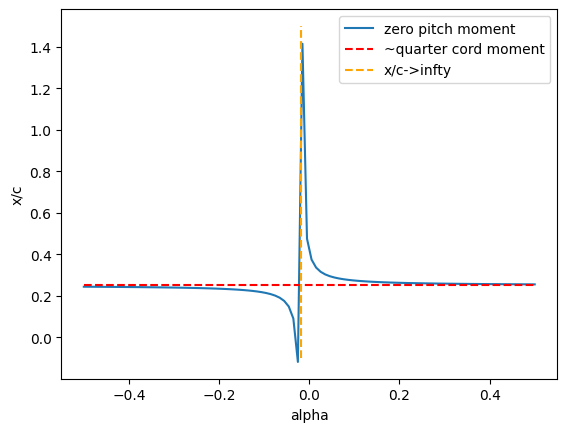

In [67]:
# 7d
x = symbols('x')
c_mc4 = pi/4 * (A_2 - A_1)
x = c/2 * (1-cos(theta))
dx = x.diff(theta)
gamma_x = 2*u*(A_0*((1+cos(theta))/sin(theta)) + A_1*sin(theta) + A_2*sin(2*theta))
c_m_c4 = -2/(u*c**2) * integrate((x-c/4)*gamma_x*dx,(theta,0,pi))
displayEquations(c_mc4, c_m_c4)
x_zero_pitch_moment = (A_0 + A_1 - A_2/2)/(4*A_0 + 2*A_1)
displayEquations('x/c', x_zero_pitch_moment.subs({pi:np.pi}))
# graphing zero pitch moment
zero_pitch = lambdify(alpha, x_zero_pitch_moment)
a = -0.5
b = 0.5
alpha_values = np.linspace(a, b, 100)
plt.plot(alpha_values, zero_pitch(alpha_values),label='zero pitch moment')
plt.hlines(.25,a,b,linestyle='dashed',color='r',label='~quarter cord moment')
plt.vlines(-.07031031965/4,-.1,1.5,linestyle='dashed',color='orange',label='x/c->infty')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('x/c')
plt.show()